Python Imports

In [11]:
import pygrib
import numpy as np
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
from pyproj import Proj
from shapely.geometry import shape
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

Pre Defined Stuff

In [12]:
# lats/lons
nx=512
ny=256

region=[0,360,30,70]

Read ERA-Interim data for Jan 6, 2010

In [13]:
inFile='/shared/working/rean/era-interim/daily/data/2010/ei.oper.an.pl.regn128cm.2010010600'
print(inFile)
plev=500
grbs = pygrib.open(inFile)

/shared/working/rean/era-interim/daily/data/2010/ei.oper.an.pl.regn128cm.2010010600


In [14]:
grbindex=pygrib.index(inFile,'name','typeOfLevel','level')
selected_grbs=grbindex.select(name='Geopotential',typeOfLevel='isobaricInhPa',level=500)

for grb in selected_grbs:
    print(grb)
    z500=grb.values
    lats, lons = grb.latlons()

z500=np.flip(z500,axis=0)
z500=z500*1e-1
lat=lats[:,0]
lat=np.flip(lat)
lon=lons[0,:]
print(z500.shape)

1:Geopotential:m**2 s**-2 (instant):regular_gg:isobaricInhPa:level 500:fcst time 0 hrs:from 201001060000
(256, 512)


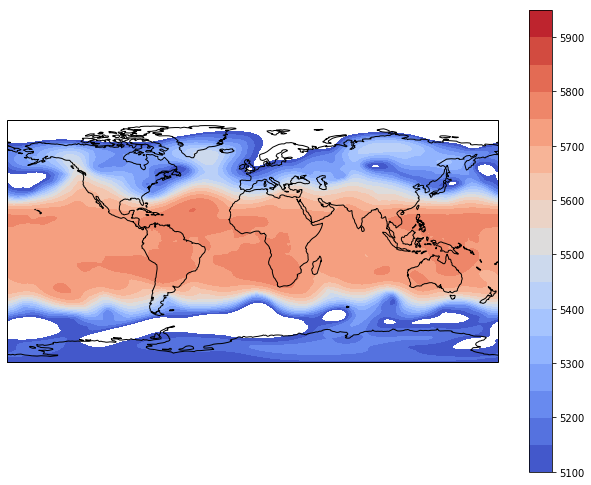

In [17]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.PlateCarree())
clevs = np.arange(5100,6000,50)
x=np.ones((ny,nx))*z500[:,np.newaxis]
datacyc,loncyc=add_cyclic_point(z500,coord=lon)
contour=ax.contourf(loncyc, lat, datacyc,levels=clevs,cmap=plt.cm.coolwarm, transform = ccrs.PlateCarree())
plt.colorbar(contour)
ax.coastlines()